Name: Aditya Singh(2K19/EP/005) & Arkajyoti Chakraborty(2K19/EP/022)

College: Delhi Technological University

Subject: Biophysics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Collecting Human Data

In [ ]:
human_dna = pd.read_table('/content/drive/MyDrive/human.txt')
human_dna

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,0
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,6


In [ ]:
human_dna.columns

Index(['sequence', 'class'], dtype='object')

Collecting Chimpanzee Data 

In [ ]:
Chimpanzee_dna = pd.read_table('/content/drive/MyDrive/chimpanzee.txt')
Chimpanzee_dna

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6
...,...,...
1677,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5
1678,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5
1679,ATGAAGCGACCCAAGGAGCCGAGCGGCTCCGACGGGGAGTCCGACG...,6
1680,ATGACTGGAACCCCAAAGACTCAAGAAGGAGCTAAAGATCTTGAAG...,3


Collecting Dog data

In [ ]:
dog_dna = pd.read_table('/content/drive/MyDrive/dog.txt')
dog_dna

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0
...,...,...
815,ATGGTCGGTCCGGAGAAGGAGCAGAGCTGGATCCCTAAGATCTTCA...,5
816,ATGGCGGCGACGGTGGCTGCGGCGGCCGCCGACGCGGGGCCGGGGG...,6
817,ATGAGCTCGGCCGACAAGGCCCGGGTGGGGCCCGCGGCCGACGGGC...,6
818,GCCCCGAGGATGGGCAGGGTCCCGCTGGCCTGGTGCTTGGCGCTGT...,1


Let's visualise the classes and data!

Text(0.5, 1.0, 'Class distribution of Human DNA')

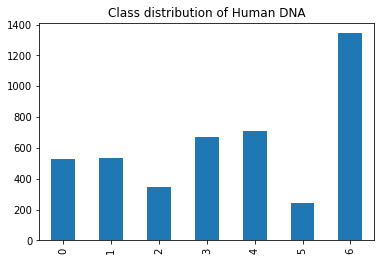

In [ ]:
human_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Human DNA")

Text(0.5, 1.0, 'Class distribution of Chimpanzee DNA')

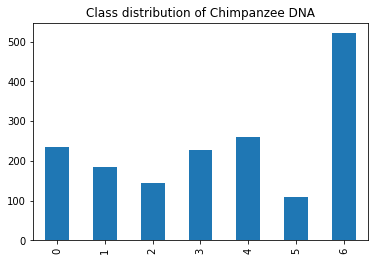

In [ ]:
Chimpanzee_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Chimpanzee DNA")

Text(0.5, 1.0, 'Class distribution of Dog DNA')

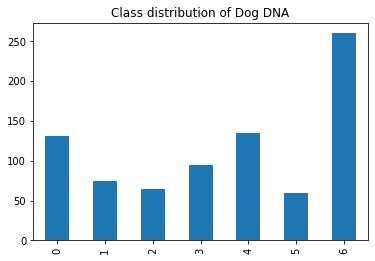

In [ ]:
dog_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Dog DNA")

The classes for our classification

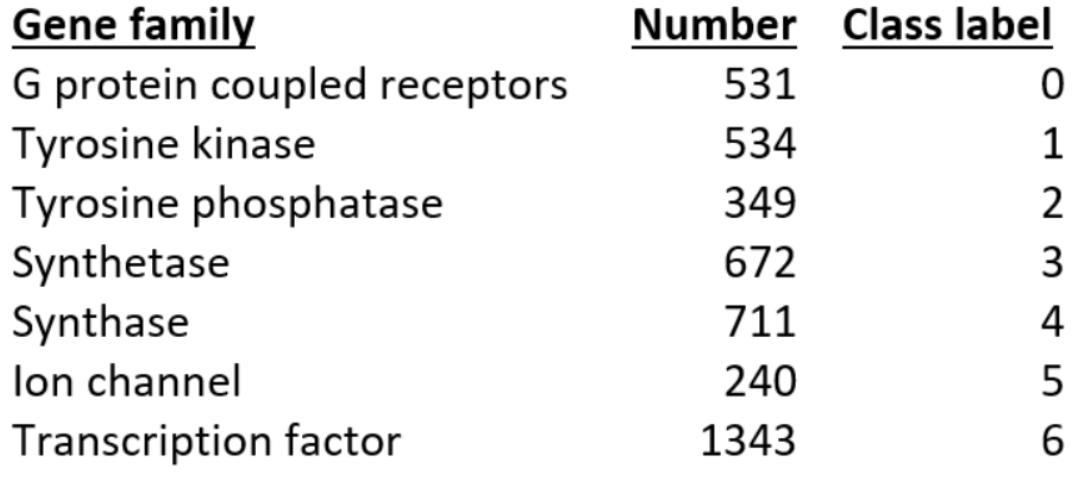

In [ ]:
# Function to change the string into k-mers words..
def Kmers_funct(seq, size=6):
  return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [ ]:
human_dna['word'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)

In [ ]:
human_dna.columns # checkpoint of whether the k-mer function worked or not. 

Index(['class', 'word'], dtype='object')

In [ ]:
human_dna['word']

0       [atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...
1       [atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...
2       [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...
3       [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...
4       [atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc...
                              ...                        
4375    [atggaa, tggaag, ggaaga, gaagat, aagatt, agatt...
4376    [atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct...
4377    [atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct...
4378    [atgggg, tggggc, ggggca, gggcac, ggcacc, gcacc...
4379    [atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct...
Name: word, Length: 4380, dtype: object

In [ ]:
Chimpanzee_dna['words'] = Chimpanzee_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
Chimpanzee_dna = Chimpanzee_dna.drop('sequence', axis=1)

dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

Check Point of our data as we have prepared our data now it's time we go into modelling part!!

In [ ]:
human_dna

,class,word
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."
...,...,...
4375,0,"[atggaa, tggaag, ggaaga, gaagat, aagatt, agatt..."
4376,6,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."
4377,6,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."
4378,6,"[atgggg, tggggc, ggggca, gggcac, ggcacc, gcacc..."


In [ ]:
dog_dna

,class,words
0,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."
...,...,...
815,5,"[atggtc, tggtcg, ggtcgg, gtcggt, tcggtc, cggtc..."
816,6,"[atggcg, tggcgg, ggcggc, gcggcg, cggcga, ggcga..."
817,6,"[atgagc, tgagct, gagctc, agctcg, gctcgg, ctcgg..."
818,1,"[gccccg, ccccga, cccgag, ccgagg, cgagga, gagga..."


In [ ]:
Chimpanzee_dna

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."
...,...,...
1677,5,"[atgctg, tgctga, gctgag, ctgagc, tgagcg, gagcg..."
1678,5,"[atgctg, tgctga, gctgag, ctgagc, tgagcg, gagcg..."
1679,6,"[atgaag, tgaagc, gaagcg, aagcga, agcgac, gcgac..."
1680,3,"[atgact, tgactg, gactgg, actgga, ctggaa, tggaa..."


In [ ]:
human_texts = list(human_dna['word'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_dna.iloc[:, 0].values

print(y_human)

[4 4 3 ... 6 6 6]


In [ ]:
chimp_texts = list(Chimpanzee_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
#separate labels
y_chim = Chimpanzee_dna.iloc[:, 0].values # y_chim for chimp_dna

dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
#separate labels
y_dog = dog_dna.iloc[:, 0].values

In [ ]:
print(y_chim)

[4 4 4 ... 6 3 3]


In [ ]:
print(y_dog)

[4 4 6 6 0 6 0 0 0 0 0 6 6 0 0 0 6 0 0 0 0 0 6 0 0 0 6 0 0 6 0 0 0 0 0 0 3
 0 6 0 6 0 6 0 6 0 0 3 3 6 6 6 6 4 0 0 4 2 0 0 0 0 6 0 6 0 0 5 5 6 4 6 0 0
 3 6 3 6 6 6 6 6 4 6 4 1 4 0 0 0 6 4 4 6 6 6 6 6 4 6 6 3 3 3 3 0 6 3 3 6 4
 4 5 6 6 1 5 2 2 1 4 2 6 3 3 6 6 6 3 3 6 6 6 3 6 6 2 0 0 6 6 3 3 3 0 0 4 6
 6 5 1 1 0 0 0 4 0 4 0 0 3 4 6 0 6 6 3 4 0 6 6 1 2 2 2 3 6 2 2 2 6 0 0 6 6
 0 0 1 6 5 5 6 0 6 0 0 4 0 0 3 4 0 0 6 6 5 5 3 4 1 0 6 5 6 6 4 4 2 2 2 4 6
 4 4 2 1 3 6 0 6 2 3 0 0 6 0 6 4 3 1 1 4 6 4 4 6 3 3 2 2 1 1 3 3 4 3 0 3 5
 5 5 5 5 5 5 2 2 4 4 6 4 4 6 6 6 0 3 3 4 3 0 0 6 0 0 6 6 1 5 5 0 0 6 6 1 1
 1 4 2 2 3 4 3 4 4 1 4 4 3 1 6 1 2 2 2 5 0 0 6 6 6 6 4 3 3 4 5 5 6 6 0 4 1
 2 4 4 3 4 4 0 0 6 0 5 4 4 4 4 0 5 3 3 6 6 6 6 6 3 4 4 2 2 3 6 0 0 2 6 4 4
 6 2 4 4 4 0 6 6 6 0 6 3 2 2 4 0 6 4 6 4 4 4 6 6 6 4 6 6 6 2 6 6 6 6 6 5 6
 0 0 0 5 5 5 4 6 6 6 6 1 1 6 6 1 4 1 1 3 6 6 1 3 2 2 0 0 4 3 0 0 5 0 1 1 1
 3 0 2 2 2 3 1 6 3 3 6 6 6 6 5 5 4 6 4 6 6 6 2 5 5 0 0 3 6 5 5 1 1 1 6 6 6
 6 1 1 2 6 6 4 6 1 3 3 6 

Vectorization 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # using countvectorizer!! 
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [ ]:
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X,y_human,test_size = 0.20,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3504, 232414)
(876, 232414)
(3504,)
(876,)


In [ ]:
from sklearn.metrics import classification_report

Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
naive_bayes_model = model.fit(X_train,y_train)
naive_bayes_model_predict = naive_bayes_model.predict(X_test)
naive_bayes_report = classification_report(y_test,naive_bayes_model_predict)
print(naive_bayes_report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       102
           1       1.00      0.98      0.99       106
           2       1.00      1.00      1.00        78
           3       0.99      0.99      0.99       125
           4       0.97      0.98      0.98       149
           5       0.94      1.00      0.97        51
           6       0.98      0.98      0.98       265

    accuracy                           0.98       876
   macro avg       0.98      0.99      0.98       876
weighted avg       0.98      0.98      0.98       876



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)
decision_tree_model = dct.fit(X_train,y_train)
decision_tree_model_predict = decision_tree_model.predict(X_test)
decision_tree_report = classification_report(y_test,decision_tree_model_predict)
print(decision_tree_report)

              precision    recall  f1-score   support

           0       0.54      0.83      0.65       102
           1       0.93      0.83      0.88       106
           2       0.92      0.87      0.89        78
           3       0.83      0.80      0.81       125
           4       0.86      0.77      0.81       149
           5       0.88      0.75      0.81        51
           6       0.88      0.84      0.86       265

    accuracy                           0.82       876
   macro avg       0.83      0.81      0.82       876
weighted avg       0.84      0.82      0.82       876



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)
random_forest_model = clf.fit(X_train,y_train)
random_forest_model_predict = random_forest_model.predict(X_test)
random_forest_report = classification_report(y_test,random_forest_model_predict)
print(random_forest_report)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       102
           1       0.98      0.86      0.91       106
           2       0.99      0.87      0.93        78
           3       0.76      0.93      0.83       125
           4       0.96      0.86      0.90       149
           5       1.00      0.84      0.91        51
           6       0.88      0.92      0.90       265

    accuracy                           0.89       876
   macro avg       0.91      0.88      0.89       876
weighted avg       0.90      0.89      0.89       876



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_reg_model = LogisticRegression(n_jobs = -1, penalty='l2', multi_class='multinomial',class_weight = 'balanced',verbose=1).fit(X_train,y_train)
lr_model_predict = logistic_reg_model.predict(X_test)
lr_model_report = classification_report(y_test, lr_model_predict)
print(lr_model_report)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


              precision    recall  f1-score   support

           0       0.99      0.92      0.95       102
           1       1.00      0.93      0.97       106
           2       1.00      0.94      0.97        78
           3       0.95      0.94      0.94       125
           4       0.99      0.91      0.95       149
           5       1.00      0.90      0.95        51
           6       0.87      1.00      0.93       265

    accuracy                           0.95       876
   macro avg       0.97      0.93      0.95       876
weighted avg       0.95      0.95      0.95       876



[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.0s finished


Conclusion: 

Naive Bayes: 98% accuracy

Decision Tree: 82%

Random Forest: 89%

Logistic Regression: 95%

In [ ]:
print("End of Project!!")

End of Project!!
